### 네이버 댓글 정보 가져와보기

### 기본 이해

In [1]:
from bs4 import BeautifulSoup

In [2]:
html = """
<html>
<head><title> test site </title></head>
<p class='class1' align="left">test3</p>
<p class='class1'>test2</p>
<p id='p1'>오늘의 주가지수 1500</p>
<span class='class3'>span tag text</span>
<p class='class4'>test3</p>
</html>
"""

In [3]:
soup = BeautifulSoup(html, 'lxml')

In [4]:
print( soup.prettify() )

<html>
 <head>
  <title>
   test site
  </title>
 </head>
 <body>
  <p align="left" class="class1">
   test3
  </p>
  <p class="class1">
   test2
  </p>
  <p id="p1">
   오늘의 주가지수 1500
  </p>
  <span class="class3">
   span tag text
  </span>
  <p class="class4">
   test3
  </p>
 </body>
</html>



### children개념 이해
* body 요소의 아이요소 가져오기

In [5]:
list(soup.children) 

[<html>
 <head><title> test site </title></head>
 <body><p align="left" class="class1">test3</p>
 <p class="class1">test2</p>
 <p id="p1">오늘의 주가지수 1500</p>
 <span class="class3">span tag text</span>
 <p class="class4">test3</p>
 </body></html>,
 '\n']

In [6]:
list(soup.body.children) 

[<p align="left" class="class1">test3</p>,
 '\n',
 <p class="class1">test2</p>,
 '\n',
 <p id="p1">오늘의 주가지수 1500</p>,
 '\n',
 <span class="class3">span tag text</span>,
 '\n',
 <p class="class4">test3</p>,
 '\n']

In [7]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

### 스파이더맨 영화정보 7페이지 정도 가져오기

In [8]:
# url = 'https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after'
basic_url = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page="
# 2page 
# 3page

### 1페이지 가져오기

In [9]:
url1 = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page=1"
page = urlopen(url1)
soup = BeautifulSoup(page, "html.parser")
comment_all = soup.find_all('td', class_='title')
comment_all

[<td class="title">
 <a class="movie color_b" href="/movie/bi/mi/basic.nhn?code=171725">스파이더맨: 뉴 유니버스</a>
 <div class="list_netizen_score">
 <span class="st_off"><span class="st_on" style="width:20%">별점 - 총 10점 중</span></span><em>2</em>
 </div>
 <br/>재밌긴개뿔 주인공 ㅈㄴ답답하고 개연성도 없고 뭔 
 			
 			
 			
 				
 				
 				
 				<a class="report" href="javascript:report('kar0****', '6lSRSSwme9oSRAAYPJILrrrpwT5N8unFQLPp3Smwiz4=', '재밌긴개뿔 주인공 ㅈㄴ답답하고 개연성도 없고 뭔 ', '17195632', 'point_after');" style="color:#8F8F8F" title="새 창">신고</a>
 </td>,
 <td class="title">
 <a class="movie color_b" href="/movie/bi/mi/basic.nhn?code=171725">스파이더맨: 뉴 유니버스</a>
 <div class="list_netizen_score">
 <span class="st_off"><span class="st_on" style="width:100%">별점 - 총 10점 중</span></span><em>10</em>
 </div>
 <br/>세상 모든 간지를 다 때려박은 영화 
 			
 			
 			
 				
 				
 				
 				<a class="report" href="javascript:report('disa****', 'BsoZ1xq82LLh3joQnbAptU9s/sVtGle8lRsJCiXG12A=', '세상 모든 간지를 다 때려박은 영화', '17193330', 'point_after');" style=

In [10]:
list(comment_all[9].children)


['\n',
 <a class="movie color_b" href="/movie/bi/mi/basic.nhn?code=171725">스파이더맨: 뉴 유니버스</a>,
 '\n',
 <div class="list_netizen_score">
 <span class="st_off"><span class="st_on" style="width:90%">별점 - 총 10점 중</span></span><em>9</em>
 </div>,
 '\n',
 <br/>,
 '코믹스와 카툰과 망가의 통섭 개그 액션, 스토리뿐만 아니라 표현으로도 차원을 넘나든다. 다양성을 품은 소년의 성장 서사가 심지어 쿨해! \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t',
 <a class="report" href="javascript:report('dead****', 'v6eAc1AJN0gfy5fsodw3afSMlhKeti+gNukTkfv+AGM=', '코믹스와 카툰과 망가의 통섭 개그 액션, 스토리뿐만 아니라 표현으로도 차원을 넘나든다. 다양성을 품은 소년의 성장 서사가 심지어 쿨해!', '17125953', 'point_after');" style="color:#8F8F8F" title="새 창">신고</a>,
 '\n']

In [11]:
print(len( comment_all ))

10


In [12]:
temp = list(comment_all[5].children)
temp[6]

'영화 줄거리가 재밌어요 \n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t'

In [13]:
temp = list(comment_all[1].children)
result = temp[6].strip()
result

'세상 모든 간지를 다 때려박은 영화'

### 여러개의 커멘트 가져오기

In [14]:
cnt = 0
comments = []
for comment in comment_all:
    temp= list(comment.children)
    if len(temp) < 5:
        cnt= cnt + 1
        continue
    else:
        try:
            cnt= cnt + 1
            result = temp[6].strip()
            comments.append(result)
        except:
            print("error cnt count", cnt)
comments

['재밌긴개뿔 주인공 ㅈㄴ답답하고 개연성도 없고 뭔',
 '세상 모든 간지를 다 때려박은 영화',
 '1212번봐도존잼;미친영화',
 '',
 '평식이 7점 ㅋ ㅋ ㅋ ㅋ 꼭봐라',
 '영화 줄거리가 재밌어요',
 '개꿀잼완전개꿀잼임ㄹㅇ',
 '끝내주는 OST와 뛰어난 영상미!',
 '와 늦게 봣는데.... 평론레기들이 8점 이상 준거면 진짜 미친거다..재미는 모르겠지만.. 여튼 웰메이드 필름',
 '코믹스와 카툰과 망가의 통섭 개그 액션, 스토리뿐만 아니라 표현으로도 차원을 넘나든다. 다양성을 품은 소년의 성장 서사가 심지어 쿨해!']

## 1-7페이지까지 가져오기

In [15]:
comments = [ ]
cnt = 0
for i in range(1,8):
    url = basic_url + str(i)
    page = urlopen(url)
    soup = BeautifulSoup(page, "html.parser")

    comment_all = soup.find_all('td', class_='title')
    for comment in comment_all:
        temp= list(comment.children)
        if len(temp) < 5:
            cnt= cnt + 1
            print("len<5 case :",cnt)
            continue
        else:
            try:
                cnt= cnt + 1
                result = temp[6].strip()
                comments.append(result)
            except:
                cnt= cnt + 1
                print("len>=5 case ",cnt)
                print(temp)
print(len(comments))
print(comments)
print(cnt)

70
['재밌긴개뿔 주인공 ㅈㄴ답답하고 개연성도 없고 뭔', '세상 모든 간지를 다 때려박은 영화', '1212번봐도존잼;미친영화', '', '평식이 7점 ㅋ ㅋ ㅋ ㅋ 꼭봐라', '영화 줄거리가 재밌어요', '개꿀잼완전개꿀잼임ㄹㅇ', '끝내주는 OST와 뛰어난 영상미!', '와 늦게 봣는데.... 평론레기들이 8점 이상 준거면 진짜 미친거다..재미는 모르겠지만.. 여튼 웰메이드 필름', '코믹스와 카툰과 망가의 통섭 개그 액션, 스토리뿐만 아니라 표현으로도 차원을 넘나든다. 다양성을 품은 소년의 성장 서사가 심지어 쿨해!', '그래픽 연출 스토리등 뭐하나 빠지는게없고  등장인물도다 특징이크게 나타난다 명작중에 명작', '소니에서 만든 최고의 애니메이션', '완전 진짜 댕꿀잼 영화다. 진짜 추천!!!!', '완벽. 굿굿', '최고! 픽사와는 또다른 화끈한 영상미에 탄탄한 스토리, 감각적 ost , 모든 면에서 완벽한 애니', '소니는 일본이니까 당연 에니메이션이~ 그러나 미국식 연출 기법으로 잘 만들었다.', '이걸 이제 보다니 ㅠㅠ 죽이네요', '소니는 앞으로 애니메이션만 만들자', '보다끔 평점너무고평가됨', '영상미랑 ost 너무 좋은데? 엄청 재밌음 그리고 삿대질은 누가 먼저한거야?', '100년에 한번 나올까 말까 한 띵작임 미쳤음', '너무지루하고졸렸어요 대여료 아깝', '친구가 재미있다 재미있다 했는데도 미루다가 지금 보는데 세상 너무 재미있어서 깜짝 놀랐습니다. 영상미도 아주 훌륭하고 나오는 노래들도 너무 취저에 스파이더맨 유니폼도 진짜 개성있고 넘 취향저격..ㅜㅜ 안보신분들 언능 보세요 진짜 후회 안합니다. 킬링 타임으로 볼려다가 집중 빡 해서 보게 되는 명작명작...', '진짜 최고임 아직 안봤다면 주저없이 오늘 저녁에 보시길..', '여러번 봤는데 볼때마다 점점 재밌어짐스토리,영상미,OST 다 좋음애니메이션 중에 제일 재밌게 봤음', '', '애니메이션의 카툰화~"신난다~"', '영화보다훨재밌슴지루하지않음', '애니싫어하는분들에게도 존잼일듯

In [16]:
import pandas as pd

In [17]:
dict_doc = {"text" : comments}
doc = pd.DataFrame(dict_doc)

In [18]:
doc.to_csv("스파이더맨리뷰.csv", index = False)

### 워드 클라우드

In [19]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [20]:
f = open("스파이더맨리뷰.csv", encoding="utf-8")
#f = open("SpiderMan.txt", 'r', encoding='utf-8')
text = f.read()
f.close()

In [21]:
from matplotlib import rc
rc('font', family='NanumGothic')

(-0.5, 399.5, 199.5, -0.5)

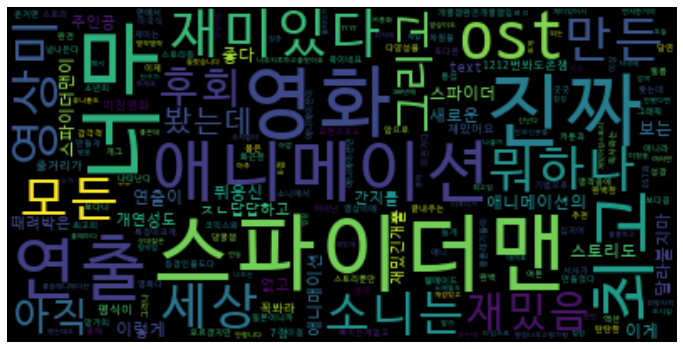

In [22]:
%matplotlib inline
from wordcloud import WordCloud
wcloud = WordCloud('./data/D2Coding.ttf', max_words=1000, relative_scaling = 0.2).generate(text)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")